# Stochastic Gradient Descent

Optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

    1 Sample some training data and run it through the network to make predictions.
    2 Measure the loss between the predictions and the true values.
    3 Finally, adjust the weights in a direction that makes the loss smaller.

In [12]:
import pandas as pd
from IPython.display import display

In [13]:
redwine = pd.read_csv(r'C:\Users\suyog\DeepLearning\dataset\red-wine.csv')

In [14]:
df_train = redwine.sample(frac=0.7, random_state=0)
df_valid = redwine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [15]:
#Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [16]:
#Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [22]:
print(X_train.shape)

(1119, 11)


# Model the network 

In [23]:
from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

# Add loss and optimizer

In [24]:
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train the model

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 49ms/step - loss: 0.2612 - val_loss: 0.1421
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1454 - val_loss: 0.1270
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1254 - val_loss: 0.1180
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1133 - val_loss: 0.1086
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1102 - val_loss: 0.1062
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1058 - val_loss: 0.1048
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1053 - val_loss: 0.1037
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1051 - val_loss: 0.1049
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1051 - val_loss: 0.1151
Epoch 10/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1077 - val_loss: 0.0999


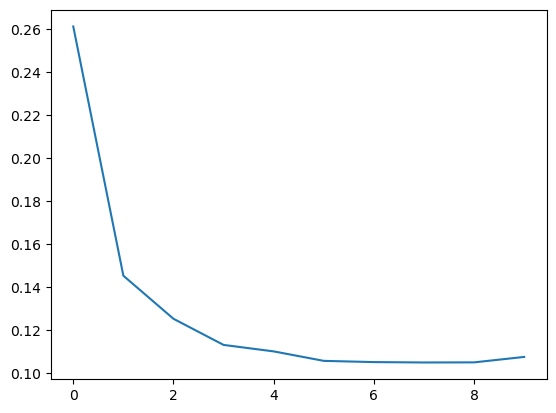

In [21]:
history_df = pd.DataFrame(history.history)
#use Pandas native plot method
history_df['loss'].plot();